# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


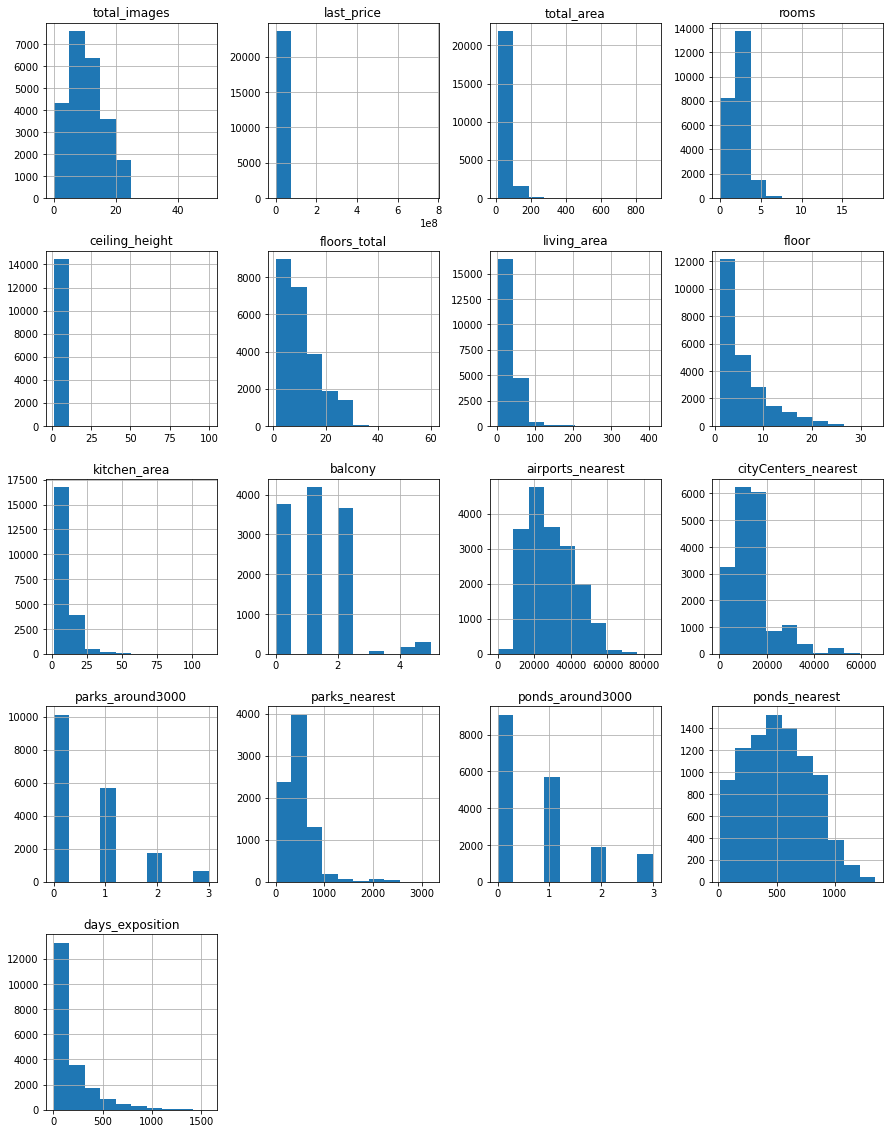

In [4]:
data.hist(figsize=(15, 20));

В данном датасете класически можно выделить две группы проблем с данными: созданными людьми и созданными техническими ошибками и спецификой. Аномалии будут в данном случае будут скорее всего именно рукотворными явлениями - основная часть данных в наборе заполняются пользователем. В целом, их вполне возможно найти и исправить. Данные, полученные картографически - обрабатывать не целесообразно, логически подобрать замену для пустых значений невозможно, к тому же, если этих объектов нет на карте, то и заполнять эти данные - откровенное вредительство.Единственный столбец с возможными дубликатами - locality_name, географические наименования в сервисах - это традиционная боль даже для пользователя, не говоря о людях, работающих с данными с другой стороны.

### Предобработка данных

**Обрабатываем пропуски**

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [7]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [8]:
data['balcony'] = data['balcony'].fillna(0.0)
data['balcony'].unique()


array([0., 2., 1., 5., 4., 3.])

In [9]:
print(data['balcony'].value_counts())

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


Поработаем с пропусками с булевыми данными - значения с пропусками будем считать за False, т.е. отрицательный результат - апартаменты в целом на рынке представленны слабее, чем жилой фонд.

In [10]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())

[False  True]


Уберем строки с пропусками, которые невозможно заполнить данными - количество строк по этим пунктам небольшое, но отсутствие этих атрибутов в дальнейшем может исказить расчеты, заполнить эти пропуски близкими значениями не представляется возможным

In [12]:
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])

In [13]:
print(data['ceiling_height'].median())
print(data['ceiling_height'].mean())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

2.65
2.7712830605621157


In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Меняем форматы данных, прежде всего формат времени

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [16]:
data['floors_total'] = data['floors_total'].astype('int64')
data['floor'] = data['floor'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')

В остальных столбцах остро вопроса смены формата не стоит. В случае с расчетом средних, медиан и прочего, формат с целых чисел уползет во float.

**Проверяем аномальные данные**

In [17]:
#Запшем инфу о размере данных до чистки
old_data = data.shape[0]

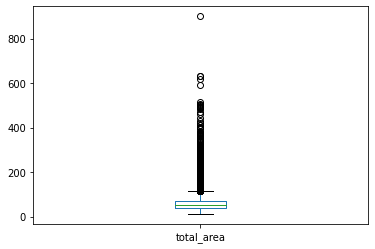

In [18]:
data['total_area'].plot(kind='box');

In [19]:
#ограничимся квартирами до 600 квадратов
data = data.query('total_area < 600')

count    23561.000000
mean        10.675948
std          6.594432
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

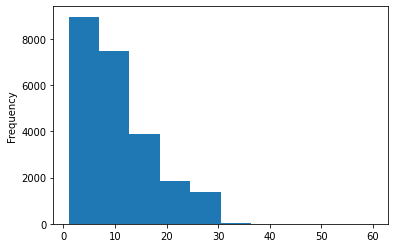

In [20]:
#Посмотрим общую этажность дома
data['floors_total'].plot(kind='hist')
data['floors_total'].describe()

Итак, есть аномалии 2 дома сомнительной этажности - 52 и 60 этажные дома. Один из них тем более в Кронштадте.

In [21]:
display(data[data['floors_total'] > 35])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.65,36,21.4,28,False,False,False,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.40,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09,2,27.00,36,41.0,13,False,False,False,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.00,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


In [22]:
#Перепишем этажность на 6, такие дома там есть, проекты 1920-1941 годов
data.loc[(data['floors_total'] == 60), 'floors_total'] = 6
#Для второго дома этажность подобрать сложнее, наиболее актуальным будет значение 32, вероятно опечатка. 
#Такая этажность у дома вполне распространена
data.loc[(data['floors_total'] == 52), 'floors_total'] = 32

In [23]:
#Остальные варианты домов редки, но существуют, посмотрим конечный итог
display(data[data['floors_total'] > 35])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.65,36,21.4,28,False,False,False,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09,2,27.00,36,41.0,13,False,False,False,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Теперь просмотрим потолки. Изучим потолки более 10.3м Данное значение пиковое для высоты потолков в элитном жилье.

In [24]:
#Видимо один из собственников захотел потолок как в Газпром-Арене
data['ceiling_height'].describe()

count    23561.000000
mean         2.724451
std          0.991070
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [25]:
display(data[data['ceiling_height'] > 10.3])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [26]:
#Два значения вылечим принудительно, остальное разделим на 10, видно что напутано с СИ.
data.loc[(data['ceiling_height'] == 100), 'ceiling_height'] = 3.2
data.loc[(data['ceiling_height'] == 14), 'ceiling_height'] = 2.7

data.loc[(data['ceiling_height'] > 10.3), 'ceiling_height'] = data['ceiling_height'] / 10
#Проверяем по фильтру
display(data[data['ceiling_height'] > 10.3])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [27]:
# Значения по комнатам выглядят допустимо. Но посмотрим.
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       56
8       12
9        8
10       3
11       2
14       2
16       1
19       1
15       1
Name: rooms, dtype: int64

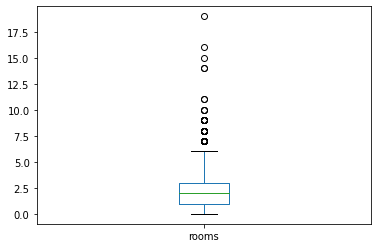

In [28]:
data['rooms'].plot(kind='box');

In [29]:
data = data.query('rooms < 10')

In [30]:
#Этажи квартир выглядят чисто
data['floor'].value_counts()

2     3347
3     3060
1     2909
4     2790
5     2610
6     1292
7     1209
8     1075
9     1045
10     684
11     520
12     519
13     376
15     340
14     333
16     315
17     226
18     175
19     144
21     119
22     111
20     108
23      98
24      61
25      45
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

In [31]:
#Анализируем цены.
print(data['last_price'].max())
print(data['last_price'].min())
display(data[data['last_price'] == 763000000])
display(data[data['last_price'] == 12190])

763000000.0
12190.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [32]:
(data['last_price'] / 1000000).plot(kind='box', figsize = (10,8))4;

SyntaxError: invalid syntax (4243096328.py, line 1)

In [ ]:
data = data.query('last_price not in [763000000, 12190]')
data = data.query('last_price < 50000000')

In [ ]:
(data['last_price'] / 1000000).plot(kind='box', figsize = (10,8));

In [ ]:
display(data.query('last_price < 500000').sort_values(by='last_price'))

Согласно усатому ящику, значения выше 12 млн за квартиру являются выбросами. Однако, верхней планкой я решил оставить значение по цене в 50 млн., т.к. рассматриваем рынок не только в области, но и в СПБ, нельзя сказать что это сильно редкие значения.

In [ ]:
data['balcony'].plot(kind='box', figsize = (10,8));

In [ ]:
data['balcony'].value_counts()

В целом, аномальным значением для квартир является наличие 3 балконов, однако в данном случае не наблюдаю какой-то острой необходисости отсеивать эти значения.

In [ ]:
#На сладкое - количество фото. 50 фото в объявлении не выглядит аномальным значением,оставим как есть.
data['total_images'].describe()

In [ ]:
new_data = data.shape[0]
print('Осталось данных', ((new_data / old_data)*100), '%')

**Обрабатываем дубликаты**

In [ ]:
print(data['locality_name'].unique())

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace(r"^(?![А-Я]).+?(?=[А-Я])", "", regex=True)
data['locality_name'].unique()

### Посчитайте и добавьте в таблицу новые столбцы

Пробившись через Авгиевы конюшни переходим к самому интересному - готовимся к анализу данных. Начнем с самого простого.

In [ ]:
#Добавляем новые столбцы
#Рассчет стоимости квадратного метра price_per_metr
data['price_per_metr'] = data['last_price'] / data['total_area']
data['price_per_metr'] = data['price_per_metr'].round()
#Добавим расстояние в км до центра
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
#Добавим день недели
data['weekday'] = data['first_day_exposition'].dt.weekday
#Добавим номер месяца
data['month'] = data['first_day_exposition'].dt.month
#Добавим номер года
data['year'] = data['first_day_exposition'].dt.year

display(data.head())

In [ ]:
#Добавим категории этажей для квартир
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)

### Проведите исследовательский анализ данных

In [ ]:
#pd.qcut(data['total_area'], 5).value_counts()
data['total_area'].hist(bins=30, range=(0, 900));

Основной массив квартир - квартиры до 100 кв.м.

In [ ]:
data['living_area'].hist(bins=35, range=(0, 250));

Жилая площадь квартир сконцентрирована в диапазоне 10-50 кв.м., что говорит о доминировании бюджетного жилья на рынке.

In [ ]:
data['kitchen_area'].hist(bins=35, range=(0, 150));

С кухнями в целом дела обстоят дела лучше, находясь в диапазоне 5-18 метров они достигают до трети от жилой площади средней квартиры.

In [ ]:
last_price_hist = data['last_price'] / 1000000
last_price_hist.hist(bins=50, range=(0,80));

Основной массив квартир находится в диапазоне цен до 8 млн. рублей, однако объемы элитной недвижимости тоже весьма существенны.

In [ ]:
data['rooms'].hist(bins=15)
print(len(data.query('rooms == 0')))

193 студии со значением 0 комнат, основная масса квартир - до 4 комнат.

In [ ]:
data['ceiling_height'].hist(bins=30, range=(0, 10.3));

Потолки тоже укладываются в стандартные значения.

In [ ]:
data['floor'].hist(bins=30);

Большая часть квартир сосредоточена с 1 по 5 этаж. Заглянув в гистограмму по total_floors все станет понятно.

In [ ]:
data['floor_type'].hist(bins=30);

Первых и последних этажей всегда меньше чем всех остальных. Данные демонстрируют очевидные факты, значит с данными все в порядке.

In [ ]:
data['floors_total'].hist(bins=30);

Основная часть домов классической этажности - 5, 9 и 16 этажей. Однако, быстрые темпы расширения городов дают о себе знать - в значительном объеме представленны 12 этажные (как правило, это угловые вставки в 9-этажные дома) и 20+-этажные человейники.

In [ ]:
data['cityCenters_nearest'].hist(bins=30);

Основная часть объявлений - квартиры удаленные от центра, видимо квартиры в центре на рынке не задерживаются.

In [ ]:
data['airports_nearest'].hist(bins=30);

Неудивительно, что жилые районы удалены от аэропортов - они источник шумового загрязнения.

In [ ]:
data['parks_nearest'].hist(bins=30);

Советская планировка дает о себе знать - как правило, в окрестностях есть зеленая зона.

In [ ]:
data['weekday'].hist(bins=30);

А это интересно - хоть в выходные больше свободного времени, но люди не любят его тратить на постинг объявлений.

In [ ]:
data['month'].hist(bins=30);

Лето и первый с последним месяц года - традиционная яма деловой активности.

**Итоги обзора данных**

1. БОльшая часть данных весьма очевидна и укладывается в обычный житейский опыт - это хорошо, значит данные хорошие и достоверные.

2. На рынке среди объявлений самые ходовые объявления это бюджетный сегмент квартир относительно небольшой площади, находящихся от 10 км. от центра традиционной этажности (5, 9, 16 этажей), однако сегмент домов высокой этажности тоже значим и в перспективе имеет тенденцию к увеличению (т.к. это новостройки)

3. В рамках недели - самые неактивные дни публикаци это выходные, лето и начало/конец года - не самое лучшее время искать предложения о новых квартирах, активность продажи квартир в это время падает.

**Скрость продажи квартир**

Найдем медианные и средние значения, заодно изучим гистограмму.

In [ ]:
print(f'Среднее количество дней объявления: {data["days_exposition"].mean().round()}')
print(f'Медианное количество дней объявления: {data["days_exposition"].median()}')
data["days_exposition"].hist();

**Вывод:** Изучив значения, мы увидим, что для обычного объявления наиболее справедливым показателем является медианный показатель - 95 дней. За этот срок продается 50% всех квартир. Если давать рекомендацию о том, какой срок продажи квартиры считать *нормальным*, то можно установить диапазон *90-180 дней*. Быстрая продажа - до 90 дней. Долгая продажа - от 1 года.

**Факторы, влияющие на стоимость квартиры**

Строим сводную таблицу.

In [ ]:
price_factors = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday', 'month', 'year']]
#display(price_factors.head())

display(price_factors.corr()) #построим всю матрицу целиком и просмотрим нужную строку, чтобы не мучаться по отдельности

price_factors.plot(x='last_price', y='total_area', kind='scatter', alpha=0.03);
price_factors.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.03);
price_factors.plot(x='last_price', y='living_area', kind='scatter', alpha=0.03);
price_factors.plot(x='last_price', y='rooms', kind='scatter', alpha=0.03);


In [ ]:
pvt_floor_type = price_factors.pivot_table(index='floor_type', values='last_price', aggfunc='median')
pvt_floor_type.plot.bar(y='last_price')
print(pvt_floor_type)

In [ ]:
pvt_weekday = price_factors.pivot_table(index='weekday', values='last_price', aggfunc='median')
pvt_weekday.plot.bar(y='last_price', figsize=(10,8))
print(pvt_weekday)

In [ ]:
pvt_month = price_factors.pivot_table(index='month', values='last_price', aggfunc='median')
pvt_month.plot.bar(y='last_price', figsize=(10,8))
print(pvt_month)

In [ ]:
pvt_year = price_factors.pivot_table(index='year', values='last_price', aggfunc='median')
pvt_year.plot.bar(y='last_price')
print(pvt_year)

**Вывод:** На основе полученных данных, можно сделать следующие выводы.

1. Фактором, наиболее сильно оказывающим влияние на стоимость объекта, является общая площадь объекта (*коэфициент корреляции  0,78*) 
2. Факторы имеющие слабую связь со стоимостью квартиры: жилая площадь(*к. 0,68*), площадь кухни (*к. 0,6*) и количество комнат (*к. 0,5*)
3. В целом, этаж квартиры оказывает влияние на стоимость квартиры. Квартиры на последнем и первом этаже уступают в стоимости квартирам на других этажах.
4. Май и июнь - месяцы на которые стоит обратить внимание, если вы хотите немного дешевле приобрести квартиру.
5. По годам, значительно выбивается 2014 год. На мой взгляд, это связано с наращиванием базы пользователей, а большинство пользователей ориентировано на более бюджетное жилье. С 2019 в целом начинается активный рост стоимости квартир, если добавить данные за следующие года, то думаю, что тренд продолжится, на это повлияла программа льготной ипотеки.
6. Стоимость квартир опубликованных на выходных немного снижается.

**Цена кв.м по НП**

In [ ]:
locality_price = pd.pivot_table(data, index='locality_name', values='price_per_metr', aggfunc=['mean', 'count'])
locality_price.columns = ['mean', 'count']
locality_price = locality_price.sort_values(by='count', ascending = False)
locality_price = locality_price.head(10)
locality_price = locality_price.sort_values(by='mean', ascending = False)
display(locality_price)

**Вывод:** 
1. Ожидаемо, наиболее дорогими обладателем квадратных метров стал Санкт-Петербург
2. Практически сопоставим по стоимости среднего квадрата г. Пушкин, вероятно за счет исторического бэкграунда и застройки, а также достопримечательностей, сосредоточенных там.
3. Наиболее дешевая недвижимость из более распространенных по объявлениям НП сосредоточена в Выборге и Всеволожске.

**Стоимость километра в СПБ**

In [ ]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
km_price = spb_data.pivot_table(index='cityCenters_nearest_km', values=['last_price', 'price_per_metr'], aggfunc=['mean'])
km_price.columns = ['last_price', 'price_per_metr']
pd.set_option('display.float_format', '{:.2f}'.format)


km_price.plot(y='last_price', kind='bar', figsize=(12,6), grid=True)
km_price.plot(y='price_per_metr', kind='bar', figsize=(12,6), grid=True);

**Вывод:** 
1. В целом, наблюдается тренд снижения стоимости недвижимости по мере удаления от центра.
2. Не типично для тренда ведет себя недвижимость с 4 по 7 км, а так же недвижимость расположенная на 27 км.

### Общий вывод

**В рамках текущего исследования были поставленны следующие задачи:**


1. Изучить следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.


Построить отдельные гистограммы для каждого из этих параметров. 


2. Изучить, как быстро продавались квартиры. Найти среднее и медианную величину. Дать ответ на вопрос, какие продажи можно считать быстрыми, а какие — необычно долгими?


3. Изучить, какие факторы больше всего влияют на общую (полную) стоимость объекта. 


4. Рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.


5. Описать, как стоимость объектов зависит от расстояния до центра города.

**В итоге, получены следующие результаты.**

1. В результате обзора данных сделаны следующие выводы:


* БОльшая часть данных весьма очевидна и укладывается в обычный житейский опыт - это хорошо, значит данные хорошие и достоверные.

* На рынке среди объявлений самые ходовые объявления это бюджетный сегмент квартир относительно небольшой площади, находящихся от 10 км. от центра традиционной этажности (5, 9, 16 этажей), однако сегмент домов высокой этажности тоже значим и в перспективе имеет тенденцию к увеличению (т.к. это новостройки)

* В рамках недели - самые неактивные дни публикаци это выходные, лето и начало/конец года - не самое лучшее время искать предложения о новых квартирах, активность продажи квартир в это время падает.

2. Изучив скорость продажи квартир, мы увидим, что для обычного объявления наиболее справедливым показателем является медианный показатель - 95 дней. За этот срок продается 50% всех квартир. Если давать рекомендацию о том, какой срок продажи квартиры считать *нормальным*, то можно установить диапазон *90-180 дней*. Быстрая продажа - до 90 дней. Долгая продажа - от 1 года.


3. Изучив влияние различных факторов, влияющих на стоимость квартиры, можно сделать следующие выводы:
* Фактором, наиболее сильно оказывающим влияние на стоимость объекта, является общая площадь объекта (*коэфициент корреляции  0,78*) 
* Факторы имеющие слабую связь со стоимостью квартиры: жилая площадь(*к. 0,68*), площадь кухни (*к. 0,6*) и количество комнат (*к. 0,5*)
* В целом, этаж квартиры оказывает влияние на стоимость квартиры. Квартиры на последнем и первом этаже уступают в стоимости квартирам на других этажах.
* Май и июнь - месяцы на которые стоит обратить внимание, если вы хотите немного дешевле приобрести квартиру.
* По годам, значительно выбивается 2014 год. На мой взгляд, это связано с наращиванием базы пользователей, а большинство пользователей ориентировано на более бюджетное жилье. С 2019 в целом начинается активный рост стоимости квартир, если добавить данные за следующие года, то думаю, что тренд продолжится, на это повлияла программа льготной ипотеки.
* Стоимость квартир опубликованных на выходных немного снижается.


4. Наиболее дорогими обладателем квадратных метров стал г. Санкт-Петербург и г. Пушкин, вероятно за счет исторического бэкграунда и застройки, а также достопримечательностей, сосредоточенных там. Наиболее дешевая недвижимость из более распространенных по объявлениям НП сосредоточена в Выборге и Всеволожске.


5. В целом, наблюдается тренд снижения стоимости недвижимости по мере удаления от центра. Не типично для тренда ведет себя недвижимость с 4 по 7 км, а так же недвижимость расположенная на 27 км, что может стать поводом для дальнейшего исследования.
